Takehome Midterm by Rasa Blourtchi

In this notebook, we will explore the exciting world of predicting passenger satisfaction in the airline industry. By utilizing the power of ensemble models, we aim to uncover valuable insights into the factors that contribute to passenger satisfaction. Ensemble models combine multiple learning algorithms to create a more robust and accurate predictive model. Through this analysis, we seek to enhance our understanding of the key drivers behind passenger satisfaction, enabling airlines to deliver exceptional experiences and cater to their customers' needs more effectively. Let's dive into the world of ensemble modeling and uncover the secrets to predicting passenger satisfaction.

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



In [94]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [95]:
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [96]:
df1.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df2.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [97]:
# Consolidating the two dataframes.
df = pd.concat([df1, df2])

In [98]:
# Performing Reconciliation to be sure that the dataframe is complete.
len(df) #129880
len(df1) #25976
len(df2) #103904


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [99]:
# Counting the number of missing values (NaNs) in each column of the df and sorting the results in descending order.
df.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Gender                                 0
Seat comfort                           0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Online boarding                        0
Customer Type                          0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
satisfaction                           0
dtype: int64

In [100]:
df.dropna(axis=0, inplace=True)

In [101]:
## Generating Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1190.210662,997.560954,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129487.0,2.728544,1.329235,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,3.057349,1.526787,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129487.0,2.756786,1.401662,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.976909,1.278506,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,3.204685,1.329905,0.0,2.0,3.0,4.0,5.0
Online boarding,129487.0,3.252720,1.350651,0.0,2.0,3.0,4.0,5.0
Seat comfort,129487.0,3.441589,1.319168,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129487.0,3.358067,1.334149,0.0,2.0,4.0,4.0,5.0


<Axes: xlabel='satisfaction', ylabel='count'>

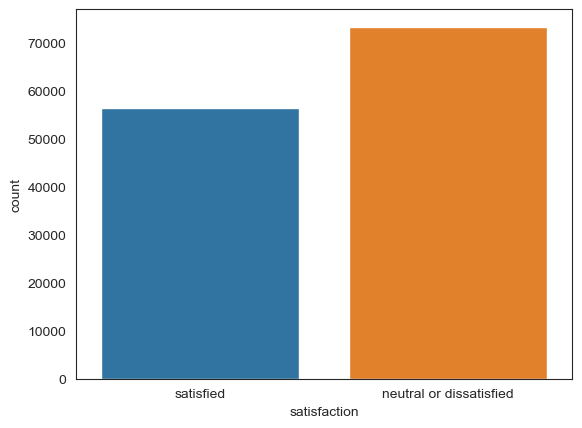

In [102]:
sns.countplot(x="satisfaction", data=df)


As we can see, in this consolidated dataframe, there are more neutral or dissatisfied passengers then there are satisfied passengers. One potential issue that I could see arising with this survery data is that passengers are much more likely to fill out a survey regarding their satisfaction with the flight when they are unsatisfied. As a result, the data could be biased. 

<Axes: xlabel='Customer Type', ylabel='count'>

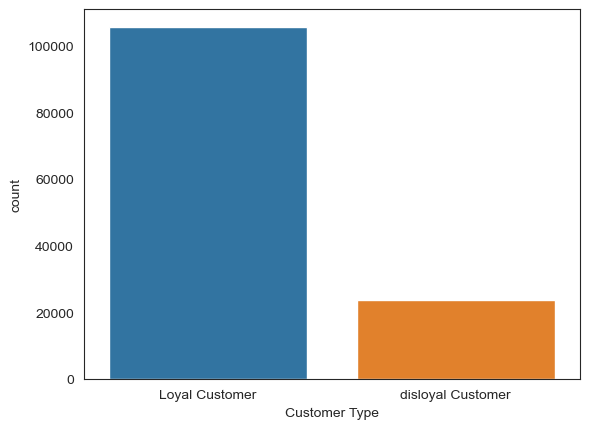

In [103]:
sns.countplot(x="Customer Type", data=df)


<Axes: xlabel='Class', ylabel='count'>

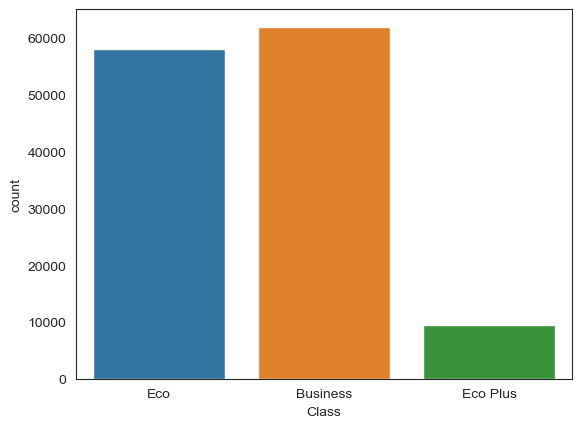

In [104]:
sns.countplot(x="Class", data=df)


Another potential issue with the dataframe is that is not very representative of all airline passengers. The plots above illustrate that the data is skewed towards customers who fly with the airline frequently as well as Business Class passengers. Ordinarily there are far less Business or First Class passengers than there are Economy passengers. In this case, there are more Business Class passengers than there are Economy.

Text(0.5, 1.0, 'Feature Importance')

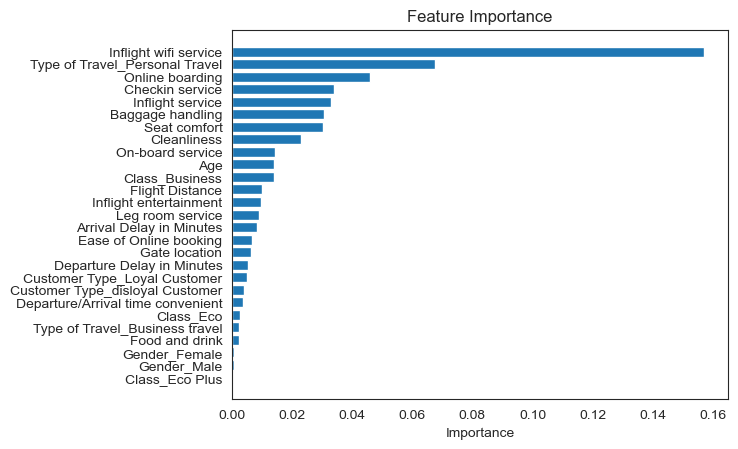

In [106]:
# Split data into features and target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Convert categorical variables into numerical variables using one-hot encoding
X = pd.get_dummies(X)

# Fit random forest classifier to data
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Compute feature importances using permutation importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=42)

# Sort features by importance
sorted_idx = result.importances_mean.argsort()

# Plot feature importances
fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
ax.set_xlabel("Importance")
ax.set_title("Feature Importance")

The output shows columns and their values like "Gender_Male", "Gender_Female", "Type of Travel_Personal Travel" because the code uses one-hot encoding to convert categorical variables into numerical variables. One-hot encoding is a technique used to represent categorical variables as binary columns.

For example, if the original categorical variable is "Gender" with values "Male" and "Female", the one-hot encoding process creates two new binary columns: "Gender_Male" and "Gender_Female". In these binary columns, a value of 1 indicates that the corresponding category is present for a particular sample, while a value of 0 indicates its absence.

Similarly, for the categorical variable "Type of Travel" with values "Personal Travel" and "Business travel", the one-hot encoding process creates two new binary columns: "Type of Travel_Personal Travel" and "Type of Travel_Business travel".

By using one-hot encoding, the machine learning model can effectively interpret and utilize these categorical variables in the analysis. Each binary column represents a specific category, and the model can consider the presence or absence of each category as a separate feature when making predictions.

 We are identifying which factors are most important for predicting passenger satisfaction. We've done this by training a machine learning algorithm called a Random Forest on data about airline passengers. The algorithm is then used to calculate the importance of each feature, or factor, in the data set. The most important features are shown in a bar chart, with the most important at the top. From what we can see above, "Inflight wifi service" is a very important to feature to include in the model when predicting passenger satisfaction. To complete the top 3, the following two most important features to include in a model which is meant to correctly classify passenger satisfaction are "Type of Travel_Personal Travel" and "Online boarding". The three variables that appear to be least important are "Class_Eco Plus", "Gender_Male", and "Gender_Female".

I will employ several ensemble methods, including Bagging, Stacking, Adaboosting, and XGboosting. Each of these techniques have their own strengths and weaknesses, and they differ in how they combine the outputs of multiple models. By leveraging the benefits of these ensemble methods, we hope to achieve a more accurate classification of passenger satisfaction in the airline industry.

In [107]:
# Select the columns to be encoded
columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Perform one-hot encoding on the selected columns
encoded_columns = pd.get_dummies(df[columns_to_encode])

# Concatenate the encoded columns with the remaining columns
edf = pd.concat([df.drop(columns_to_encode, axis=1), encoded_columns], axis=1)

In [108]:
edf.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,52,160,5,4,3,4,3,4,3,5,...,0,1,0,1,0,0,1,0,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,0,1,0,1,0,1,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,1,0,1,1,0,0,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,1,0,1,0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,0,1,0,1,0,0,1,0,0,1


In [109]:
# Dropping this column and only making predictions on satisfaction_satisfied
edf = edf.drop('satisfaction_neutral or dissatisfied', axis=1)

# Renaming column
edf = edf.rename(columns={'satisfaction_satisfied': 'satisfaction'})

In [116]:
# Manually choose the features to include in the model
features = ["Inflight wifi service", "Type of Travel_Personal Travel", "Online boarding","Checkin service","Inflight service","Baggage handling","Seat comfort", "Cleanliness"]

# Split the data into features and target
X = edf[features]
y = edf["satisfaction"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create a bagging classifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7), n_estimators=5000, random_state=100)

# Train the model on the training set
bagging.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = bagging.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 2)
print("Accuracy: {}%".format(accuracy_percentage))

/Users/rasablourtchi/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 91.49%


We have successfully built a bagging model that achieves a 91.49% accuracy in predicting passenger satisfaction. By incorporating various features like inflight wifi service, type of travel, online boarding, check-in service, inflight service, baggage handling, seat comfort, and cleanliness, our model offers valuable insights into the factors influencing passenger satisfaction. By leveraging these insights, airlines can proactively address customer needs and deliver exceptional travel experiences. Next, we will create a stacking model which combines the predictions of multiple individual models to make more accurate predictions.

In [121]:
# Manually choose the features to include in the model
features = ["Inflight wifi service", "Type of Travel_Personal Travel", "Online boarding",
            "Checkin service", "Inflight service", "Baggage handling", "Seat comfort", "Cleanliness"]

# Split the data into features and target
X = edf[features]
y = edf["satisfaction"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Define the base estimators for stacking
estimators = [
    ("rf", RandomForestClassifier(random_state=42)),
    ("lr", LogisticRegression(random_state=42)),
    ("dt", DecisionTreeClassifier(random_state=42))
]

# Create the stacking classifier
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))

# Train the model on the training set
stacking.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = stacking.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 2)
print("Accuracy: {}%".format(accuracy_percentage))

Accuracy: 92.6%


We have successfully created a stacking model utilizing Random Forests, Logistic Regression, and Decision Trees, which yielded an impressive accuracy of 92.6% in predicting passenger satisfaction. By combining the predictions of these diverse models, our stacking model showcases the strengths and expertise of each individual algorithm, resulting in improved predictive accuracy. This high accuracy of 92.6% demonstrates the effectiveness of our approach in predicting passenger satisfaction. We will now create an Adaboosting model which combines multiple weak models to make accurate predictions.

In [129]:
# Manually choose the features to include in the model
features = ["Inflight wifi service", "Type of Travel_Personal Travel", "Online boarding",
            "Checkin service", "Inflight service", "Baggage handling", "Seat comfort", "Cleanliness"]

# Split the data into features and target
X = edf[features]
y = edf["satisfaction"]

AdaBoost = AdaBoostClassifier(n_estimators=500,learning_rate=1,algorithm='SAMME')
AdaBoost.fit(X,y)
prediction = AdaBoost.score(X,y)
print('The accuracy is: ',prediction*100,'%')

The accuracy is:  90.10170905187394 %


Using the AdaBoosting algorithm, we achieved an accuracy of 90.1% in our predictions. By leveraging an ensemble of weak models, our AdaBoosting model effectively combines their collective strengths to make accurate predictions. This high accuracy demonstrates the effectiveness of our approach in capturing and utilizing the valuable information from the selected features. This model holds great potential for making accurate predictions and providing valuable insights in various domains. Lastly, we will create an XGBoosting model which further enhances our predictive capabilities by leveraging a powerful gradient boosting algorithm.

In [138]:
# Manually choose the features to include in the model
features = ["Inflight wifi service", "Type of Travel_Personal Travel", "Online boarding",
            "Checkin service", "Inflight service", "Baggage handling", "Seat comfort", "Cleanliness"]

# Split the data into features and target
X = edf[features]
Y = edf["satisfaction"]

# split data into train and test sets
seed = 7
test_size = 0.20
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=test_size, random_state=seed)

# creating an xgboosting model, 
model = XGBClassifier(booster="gbtree", n_estimators = 100 ,learning_rate=1)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:%.2f%%" % (accuracy * 100.0))


Accuracy:93.56%


Using XGboosting, we achieved an accuracy of 93.56% in our predictions. The hyperparameter booster="gbtree" specifies the choice of booster algorithm as gradient boosting using decision trees in XGBoost. XGBoosting achieved the highest accuracy among the ensemble models by effectively combining the strengths of multiple weak models through boosting. It leverages the power of gradient boosting with decision trees, enabling it to capture complex relationships and make accurate predictions. The advanced optimization techniques used in XGBoosting contribute to its superior performance and predictive accuracy.